In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

C:\Users\sivap\AppData\Local\Temp\ipykernel_1988\1397409755.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df=pd.read_csv("C:/Users/sivap/Downloads/Alcohol_Sales.csv",index_col='DATE', parse_dates=True)
df.index.freq='MS'

In [4]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [5]:
df.columns=['Sales']

<Axes: xlabel='DATE'>

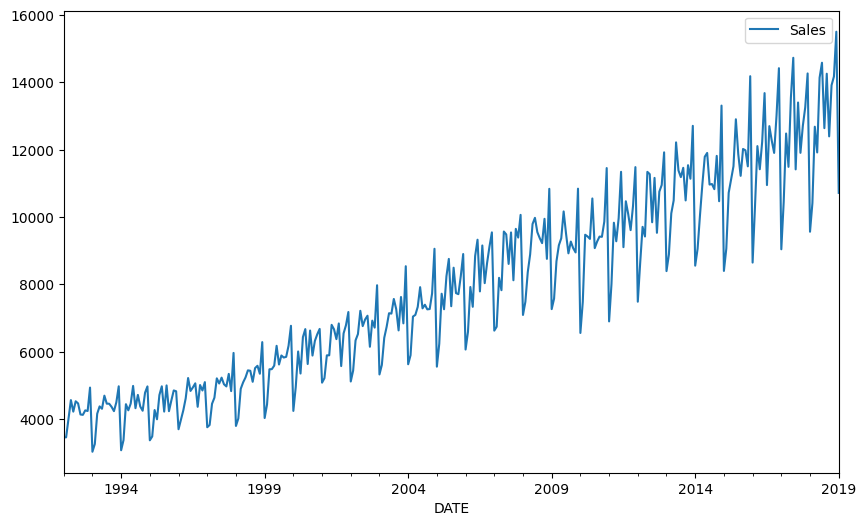

In [6]:
df.plot(figsize=(10,6))

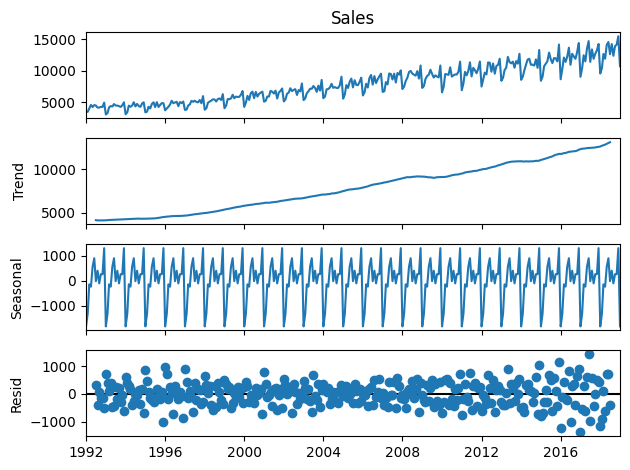

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
results=seasonal_decompose(df['Sales'])
results.plot();

<Axes: xlabel='DATE'>

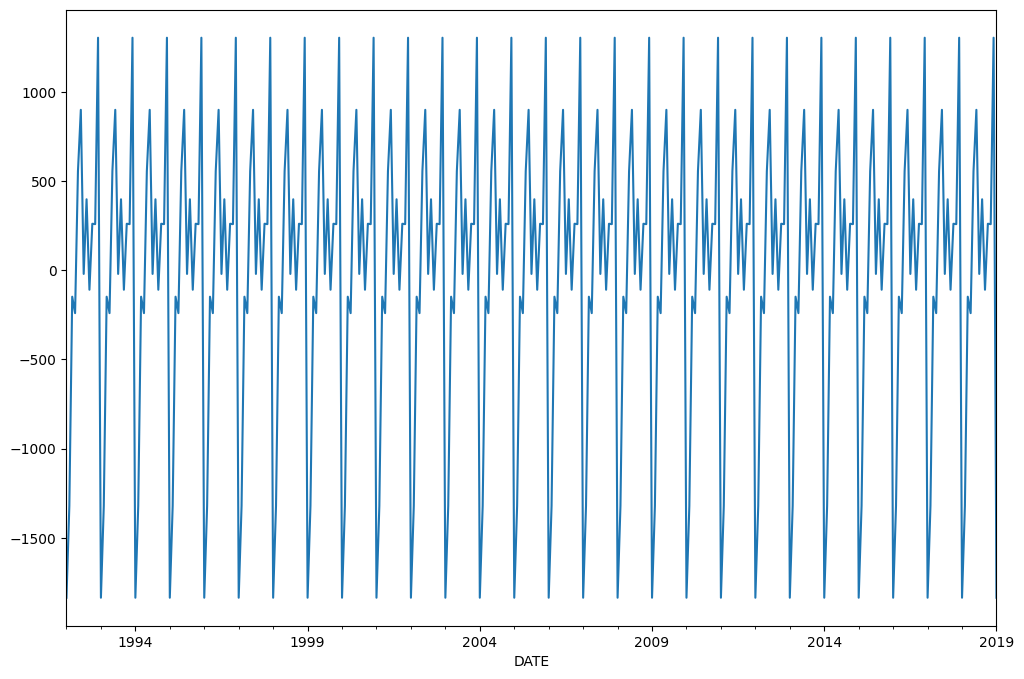

In [8]:
results.seasonal.plot(figsize=(12,8))

In [9]:
len(df)

325

In [10]:
train=df.iloc[:313]
test=df.iloc[313:]

### scale or normalise data

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler=MinMaxScaler()

In [13]:
#fit, transform or fit_transform
scaler.fit(train) #find max value
scaled_train=scaler.transform(train) #fit into the range 0 and 1

In [14]:
scaled_test=scaler.transform(test)

In [15]:
#Batching time series

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


In [16]:
import keras
print(keras.__version__)


3.7.0


In [18]:
len(scaled_train)

313

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [22]:
n_input=12
n_features=1 #(only one time stamp column)

train_generator=TimeseriesGenerator(scaled_train, scaled_train, length= n_input, batch_size=1)

In [23]:
model= Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))

C:\Users\sivap\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 150)                 │          91,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             151 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,351 (356.84 KB)

 Trainable params: 91,351 (356.84 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.fit(train_generator, epochs=25)

Epoch 1/25


C:\Users\sivap\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


301/301 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0365
Epoch 2/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0088
Epoch 3/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0070
Epoch 4/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0075
Epoch 5/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0066
Epoch 6/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0039
Epoch 7/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0047
Epoch 8/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0026
Epoch 9/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0028
Epoch 10/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0025
Epoch 11/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0023
Epoch 12/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0018
Epoch 13/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0018
Epoch 14/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0015
Epoch 15/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0017


In [26]:
model.history.history.keys()

dict_keys(['loss'])

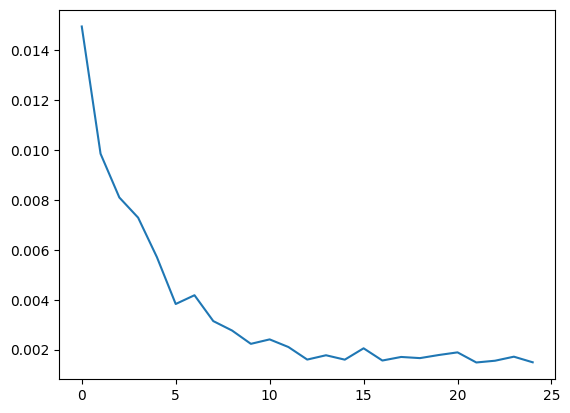

In [27]:
myloss=model.history.history['loss']
plt.plot(range(len(myloss)), myloss)

### forecast using RNN Model

In [28]:
test_predictions=[]
first_eval_batch=scaled_train[-n_input:]
current_batch=first_eval_batch.reshape(1, n_input, n_features)
for i in range(len(test)):
    current_pred=model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]], axis=1)#append historical 11 values(excluding the first value) in current batch and predicted value 
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [29]:
test_predictions

[array([0.7149167], dtype=float32),
 array([0.8435047], dtype=float32),
 array([0.79187155], dtype=float32),
 array([0.96194196], dtype=float32),
 array([1.0306962], dtype=float32),
 array([0.77769494], dtype=float32),
 array([0.9339091], dtype=float32),
 array([0.8036412], dtype=float32),
 array([0.88367987], dtype=float32),
 array([0.9252802], dtype=float32),
 array([0.9955284], dtype=float32),
 array([0.6157792], dtype=float32)]

In [30]:
true_predictions=scaler.inverse_transform(test_predictions)

In [31]:
true_predictions

array([[11394.81054449],
       [12899.16179985],
       [12295.10523653],
       [14284.75896049],
       [15089.11430144],
       [12129.25310969],
       [13956.80277354],
       [12432.79839957],
       [13369.17076159],
       [13855.85321605],
       [14677.68675095],
       [10235.00110716]])

In [32]:
test['Predictions']=true_predictions

C:\Users\sivap\AppData\Local\Temp\ipykernel_1988\2664784394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions']=true_predictions


In [33]:
test

,Sales,Predictions
DATE,,
2018-02-01,10415,11394.810544
2018-03-01,12683,12899.161800
2018-04-01,11919,12295.105237
2018-05-01,14138,14284.758960
2018-06-01,14583,15089.114301
2018-07-01,12640,12129.253110
2018-08-01,14257,13956.802774
2018-09-01,12396,12432.798400
2018-10-01,13914,13369.170762


<Axes: xlabel='DATE'>

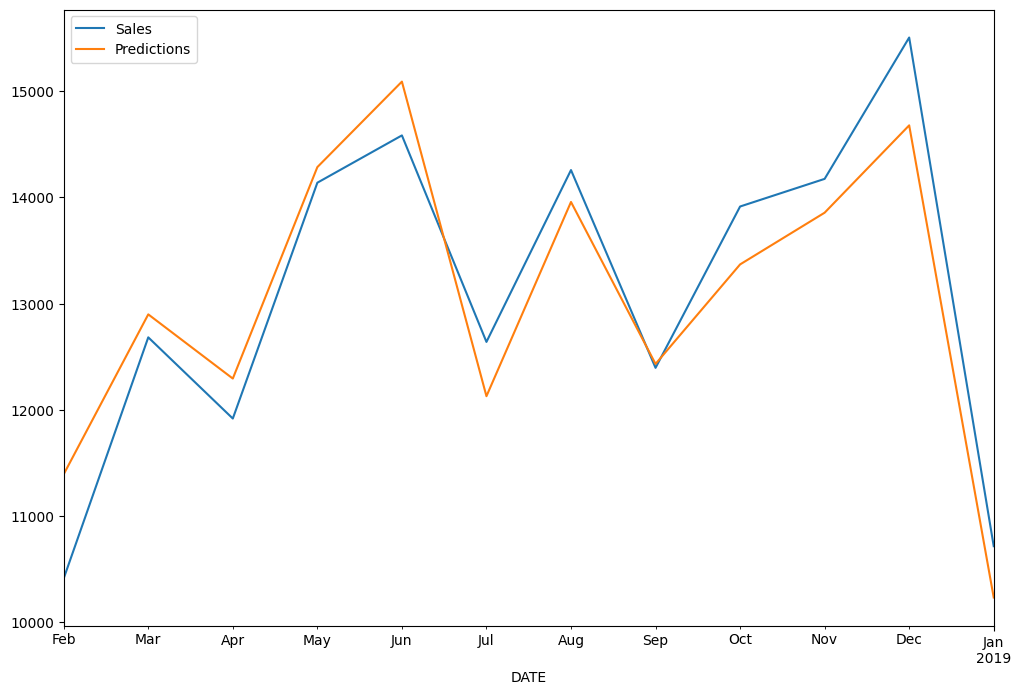

In [34]:
test.plot(figsize=(12,8))

In [ ]:
model.save('mymodel.h5')


### Forecast into Unknown Future

In [52]:
test_predictions=[]
first_eval_batch=scaled_train[-n_input:]
current_batch=first_eval_batch.reshape(1, n_input, n_features)
for i in range(50):
    current_pred=model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━

In [53]:
true_predictions=scaler.inverse_transform(test_predictions)

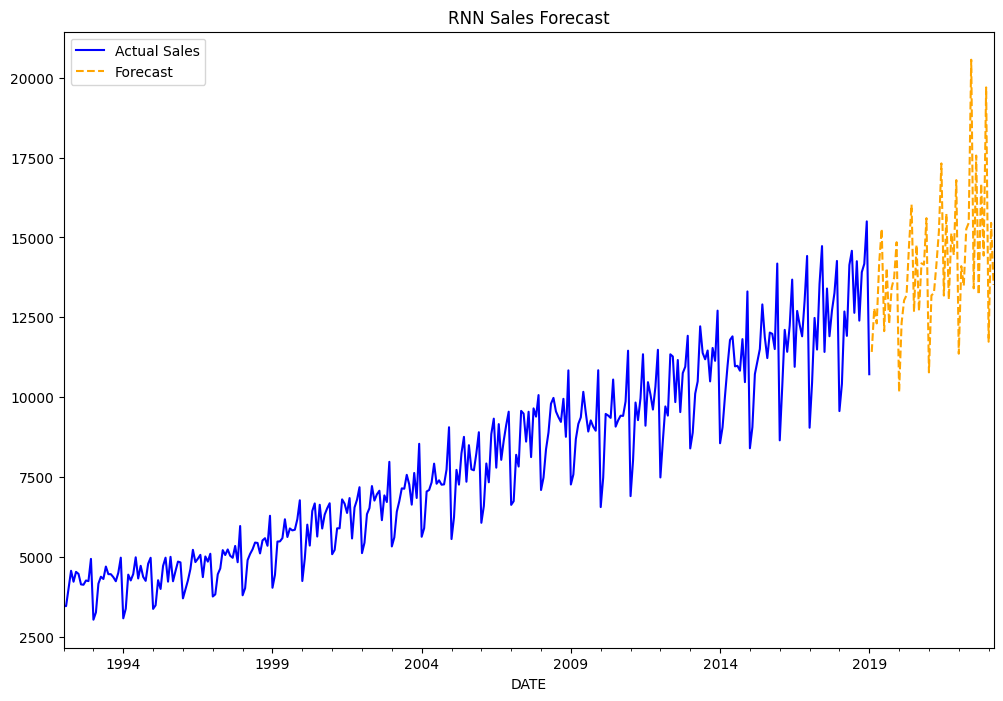

In [57]:
future_dates = pd.date_range(start=df.index[-1] + pd.offsets.MonthBegin(1), periods=50, freq='MS')
forecast_df = pd.DataFrame({'DATE': future_dates, 'Forecast': np.array(true_predictions).flatten()}).set_index('DATE')
plt.figure(figsize=(12, 8))
df['Sales'].plot(label='Actual Sales', color='blue')
forecast_df['Forecast'].plot(label='Forecast', color='orange', linestyle='dashed')
plt.legend()
plt.title('RNN Sales Forecast')
plt.show()
